In [316]:
import numpy as np
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
import matplotlib.pyplot as pp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy import misc

img = mpimg.imread('input/hm05.png')
print(img[img > 0])

[0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]


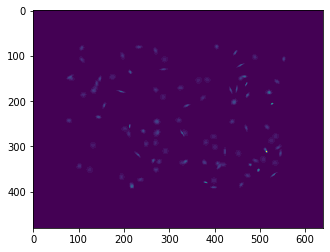

In [317]:
imgplot = plt.imshow(img)

In [318]:
def detect_peaks(image):
    """
    Takes an image and detect the peaks usingthe local maximum filter.
    Returns a boolean mask of the peaks (i.e. 1 when
    the pixel's value is the neighborhood maximum, 0 otherwise)
    """

    # define an 8-connected neighborhood
    neighborhood = generate_binary_structure(2,2)

    #apply the local maximum filter; all pixel of maximal value 
    #in their neighborhood are set to 1
    local_max = maximum_filter(image, footprint=neighborhood)==image
    #local_max is a mask that contains the peaks we are 
    #looking for, but also the background.
    #In order to isolate the peaks we must remove the background from the mask.

    #we create the mask of the background
    background = (image==0)

    #a little technicality: we must erode the background in order to 
    #successfully subtract it form local_max, otherwise a line will 
    #appear along the background border (artifact of the local maximum filter)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)

    #we obtain the final mask, containing only peaks, 
    #by removing the background from the local_max mask (xor operation)
    detected_peaks = local_max ^ eroded_background

    return detected_peaks       

In [322]:

height, width = img.shape

output = np.zeros(img.shape)

print(img.dtype)

gauss = gaussian_filter(img, sigma=5)

for j in range(1, width-1):
    for i in range(1, height-1):
        if gauss[i, j] > gauss[i, j-1] and gauss[i, j] > gauss[i, j+1] \
                and gauss[i, j] > gauss[i-1, j] and gauss[i, j] > gauss[i+1, j]:
            output[i, j] = 1

float32


89


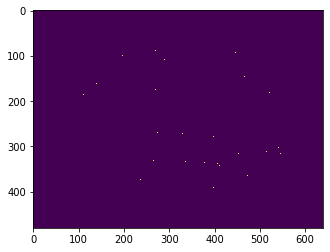

In [323]:
plt.imshow(output)
print(detect_peaks(gauss).sum())